# Pneumonia Detection using CNN

## About the Dataset
This dataset consists of **5,863 images** of Chest X-ray. Collected from pediatric patients aged one to five years old at Guangzhou Women and Children’s Medical Center. The dataset is organized into train, test, and validation folders, each containing two categories: Pneumonia and Normal.

### Dataset Details:
- **Source**: [Pediatric Chest X-ray]
- **Total Images**: 5,863 
- **Classes**:
  - Normal
  - Pneumonia

## Problem Statement

The goal is to build a CNN-based model capable of accurately detecting pneumonia from chest X-ray images. Early and precise diagnosis is critical for prompt treatment, and an AI-assisted tool can greatly enhance the efficiency and accuracy of clinical workflows.

# Importing Libraries

In [1]:
# data processing, CSV & image file
import os
import re
import requests
from PIL import Image
import pandas as pd
import numpy as np

#libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# import Deep learning Libraries
#preprocessing, modeling & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model


from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')


2025-05-09 20:12:14.391575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746821534.571138      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746821534.625704      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Preprocessing

**Read data and store it in dataframe**

## Train
Generating image paths and associating them with labels.  
The code iterates through `train_data_dir` to collect image paths and associate them with their corresponding class labels. It combines the paths and labels into two lists, then merges them into a pandas DataFrame (`train_df`).

- **os.walk()** to traverse the directory structure.
- **os.path.join()** constructs the full file paths.
- **os.path.basename()** assigns labels based on the folder names.



In [2]:
train_data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'

# Generate file paths and labels
filepaths, labels = zip(*[(os.path.join(root, file), os.path.basename(root)) 
                          for root, dirs, files in os.walk(train_data_dir) 
                          for file in files])

# Create a DataFrame
train_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})


**Displaying the `train_df` DataFrame.**



   This helps to quickly verify that the data has been loaded correctly.



In [3]:
train_df

,filepaths,labels
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
...,...,...
5211,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5212,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5213,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5214,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


## Test

Generating image paths and associating them with labels.  
The code iterates through `test_data_dir` to collect image paths and associate them with their corresponding class labels. It combines the paths and labels into two lists, then merges them into a pandas DataFrame (`ts_df`).



In [4]:
test_data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

# Generate file paths and labels
filepaths, labels = zip(*[(os.path.join(root, file), os.path.basename(root)) 
                          for root, _, files in os.walk(test_data_dir) 
                          for file in files])

# Create DataFrame
ts_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

**Displaying the `ts_df` DataFrame**

In [5]:
ts_df

,filepaths,labels
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
...,...,...
619,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
620,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
621,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
622,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL



## Validation

Generating image paths and associating them with labels.  
The code iterates through `val_data_dir` to collect image paths and associate them with their corresponding class labels. 
It combines the paths and labels into two lists, then merges them into a pandas DataFrame (`valid_df`).


In [6]:
val_data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
# Generate file paths and labels
filepaths, labels = zip(*[(os.path.join(root, file), os.path.basename(root)) 
                          for root, _, files in os.walk(val_data_dir) 
                          for file in files])

# Create DataFrame
valid_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

**Displaying the `valid_df` DataFrame**

In [7]:
valid_df

,filepaths,labels
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
5,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
6,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
7,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
8,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
9,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


## Number of occurrences of each label in the `valid_df` dataframe.

In [8]:
valid_df['labels'].value_counts()

labels
PNEUMONIA    8
NORMAL       8
Name: count, dtype: int64

## Combining Training and Validation Data

Since the original validation set was too small, we combined the training and validation data into a single dataframe (`df_combined`).  

In [9]:
#combinig train_df,valid_df in one dataframe
df_combined = pd.concat([train_df, valid_df], ignore_index=True)

## Splitting Data into Training and Validation Sets

- Re-spliting `df_combined` into a new training and validation set, allocating **10%** of the data for validation.  
- This ensures a more balanced and representative validation set.


   
  `shuffle=True` ensures that the data is mixed before splitting.  

In [10]:
train_df, valid_df = train_test_split(
    df_combined,
    test_size=0.1,  # 10% for validation
    shuffle=True,
    random_state= None
)

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(valid_df)}")

Training set size: 4708
Validation set size: 524


## Plotting Class Distribution
  
Ploting a bar chart showing how many images there are in each class in the combined dataset.
- visualize class distribution in the dataset.

  

    `sns.barplot` generating bar plot.

    `plt.show()` displaying the plot.



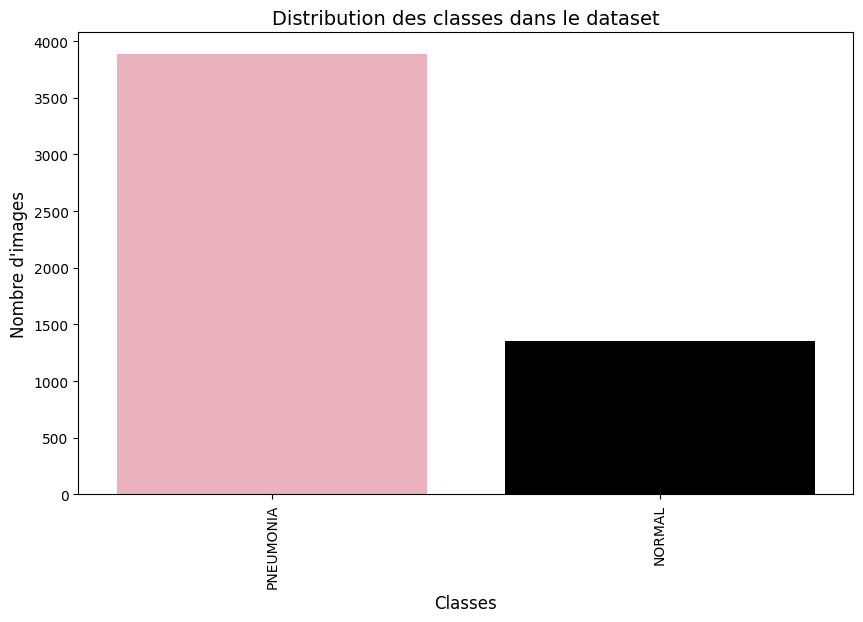

In [11]:
class_counts = df_combined['labels'].value_counts()

colors = ["#F4A7B9", "#000000"] 

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=colors*len(class_counts))

plt.xlabel("Classes", fontsize=12)
plt.ylabel("Nombre d'images", fontsize=12)
plt.title("Distribution des classes dans le dataset", fontsize=14)
plt.xticks(rotation=90) 

plt.show()

## Setting Up Image Generators for Training, Validation, and Testing

Preparing the data for training and testing.


- image sizes will be changed to 224*224 pixcel.
- batch_size indicates that the model will run 16 image in row in every training.
- channels indicates rgb colors.

 
- `ImageDataGenerator` enables real-time data augmentation and preprocessing, making it easier to handle large datasets by loading images in batches. This ensures efficient training of the model.


- `ImageDataGenerator()` used to create generators :(`tr_gen` for training and `ts_gen` for validation/testing).
- `flow_from_dataframe` Loads images from file paths.


In [12]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( ts_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 4708 validated image filenames belonging to 2 classes.
Found 524 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


# Sample of data
Displaying the first 16 images from the training set with their class labels.
To visually verify that images and labels are loaded correctly.


- `next(train_gen)` to get the next batch of images and labels from the generator.
- `plt.subplot` creating a 4x4 grid of images to display 16 images.
- `plt.show()` displays the grid.


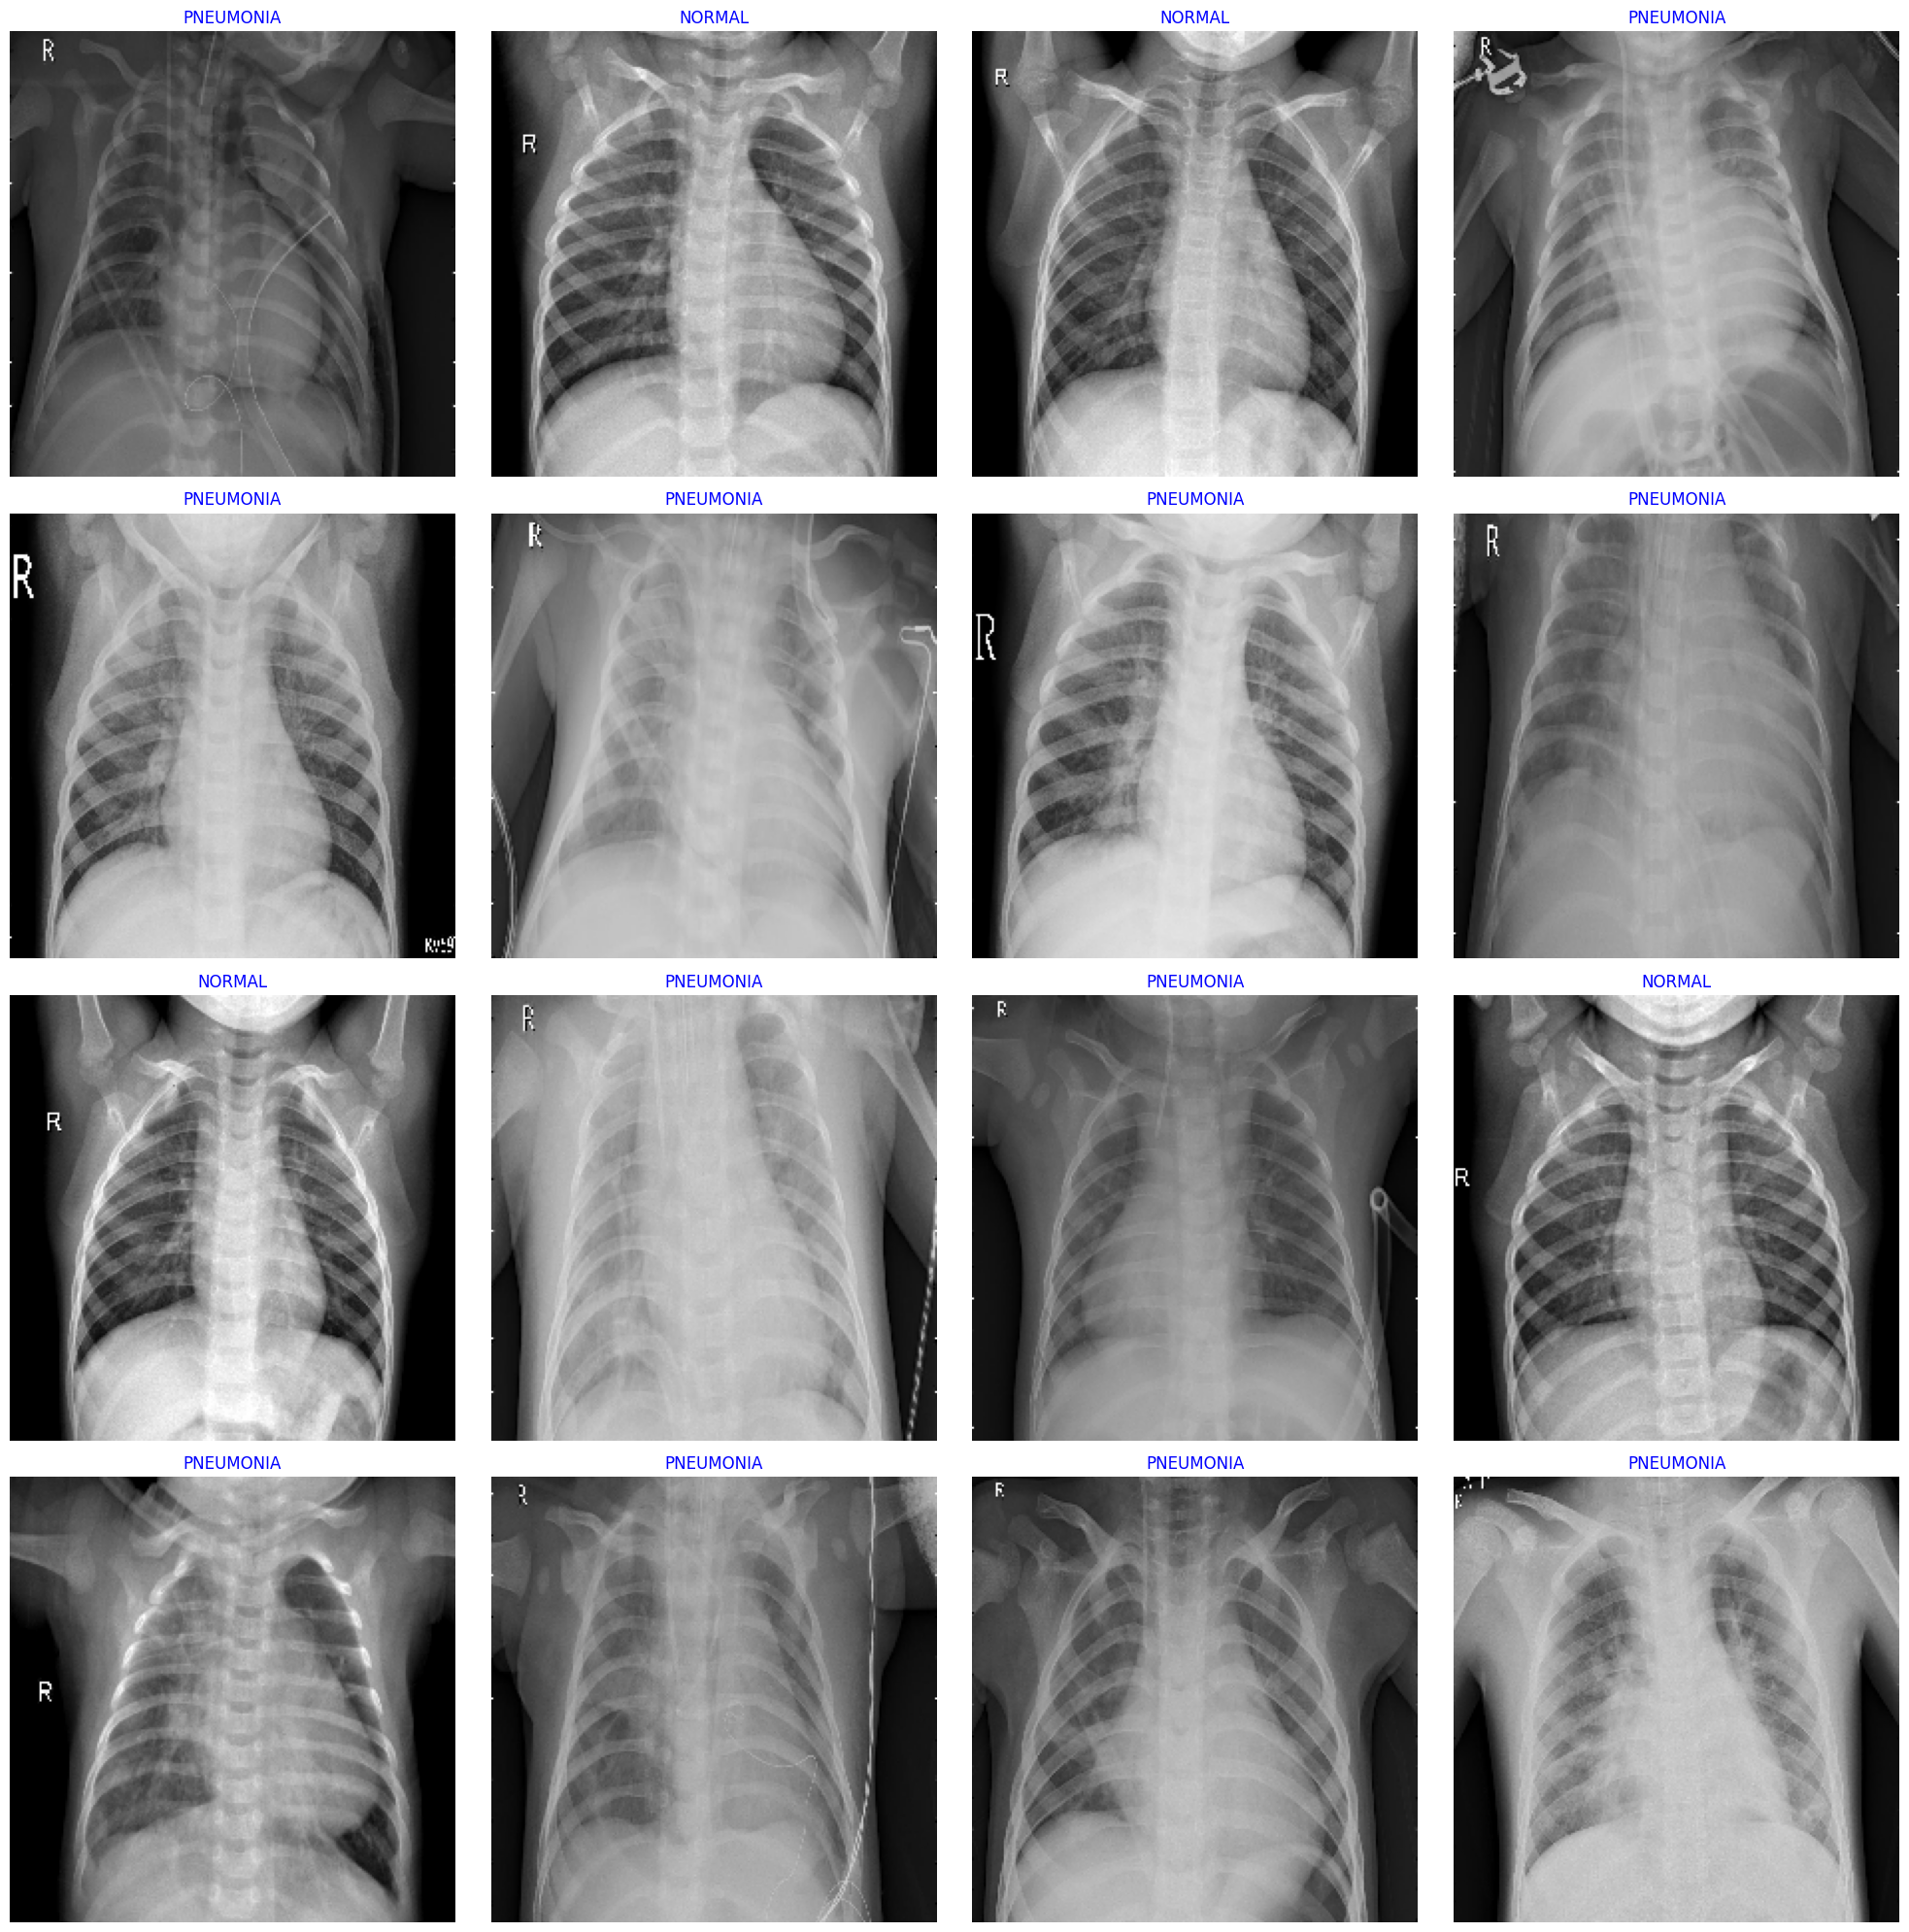

In [13]:
g_dict = train_gen.class_indices      
classes = list(g_dict.keys())      
images, labels = next(train_gen)      


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Convolutional Neural Network (CNN) Model

## Create the Convolutional Neural Network (CNN) Model Structure

Defining a model structure that can learn the patterns in the images and classify them into the appropriate categories. This model uses convolutional layers to extract features from the images and fully connected layers to perform the final classification.

- `Sequential` API from Keras to define the model. It adds layers in a linear stack.
- The model starts with several convolutional layers (`Conv2D`) to learn images features.
- `MaxPooling2D` layers to help the model focus on the most important parts.
- The model goes deeper with more filters (64 → 128 → 256 → 512) to learn complex patterns.
- After feature extraction, it flattens the data and passes it through fully connected layers (`Dense`).
- The final Dense layer uses softmax to output the probability for each of the 2 classes.

compiled the model with:
 1. `Adamax` optimizer for stable training.
 2. `categorical_crossentropy` for multi-class classification task.
 3. `accuracy` to track the model's performance.




- `model.summary()` display the architecture of the model.

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),#ikalas taille sur2

    Flatten(),#3D to 1D
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

I0000 00:00:1746821554.545031      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,154,050 (80.70 MB)

 Trainable params: 21,154,050 (80.70 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model 


Training the model so it can learn to classify images based on the patterns it detects. The training process involves the model seeing the data multiple times (epochs) and updating its weights to minimize the loss.

 
- `batch_size=16` the model will process 16 images per batch.
- `epochs=20` the model will see the entire training set 20 times during training.
- `model.fit()` is used to start the training process.  
  - `x=train_gen` specifies the training data generator.
  - `verbose=1` ensures that the training progress will be displayed.
  - `validation_data=valid_gen` provides the validation dataset to evaluate the model after each epoch.
  - `validation_steps=None` means the validation data will be taken directly from `valid_gen` without any specific step count.
  - `shuffle=False` ensures that the validation data is not shuffled, keeping the order intact for evaluation.


In [15]:
batch_size = 16   # num of images per training
epochs = 10       # how many times the model sees the entire training set

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False)

Epoch 1/10


I0000 00:00:1746821561.605529      93 service.cc:148] XLA service 0x782eb401a6f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746821561.606307      93 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746821562.104645      93 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/295 ━━━━━━━━━━━━━━━━━━━━ 1:26:27 18s/step - accuracy: 0.3125 - loss: 0.7012

I0000 00:00:1746821573.840053      93 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


295/295 ━━━━━━━━━━━━━━━━━━━━ 108s 308ms/step - accuracy: 0.7440 - loss: 16.2489 - val_accuracy: 0.8473 - val_loss: 0.3536
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 44s 147ms/step - accuracy: 0.8836 - loss: 0.2638 - val_accuracy: 0.8798 - val_loss: 0.2451
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 145ms/step - accuracy: 0.9288 - loss: 0.1764 - val_accuracy: 0.9752 - val_loss: 0.0988
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - accuracy: 0.9621 - loss: 0.0989 - val_accuracy: 0.9676 - val_loss: 0.0935
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - accuracy: 0.9723 - loss: 0.0753 - val_accuracy: 0.9733 - val_loss: 0.0854
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 145ms/step - accuracy: 0.9814 - loss: 0.0569 - val_accuracy: 0.9466 - val_loss: 0.1385
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 44s 150ms/step - accuracy: 0.9793 - loss: 0.0580 - val_accuracy: 0.9771 - val_loss: 0.0689
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 45s 151ms/step - accuracy: 0.9817 - loss: 0.0473 - v

## Saving Model

 
The trained model is being saved to a file named `Model.h5`.

This allows to use it later without needing to retrain it.

  
  - `model.save('Model.h5')` saves the entire model, including its architecture, weights, and training configuration, to a file named `Model.h5`.  
  - `.h5` format is commonly used to save Keras models.

In [16]:
#Save the model
model.save('Model.h5')

## Loading The Saved Model


The previously saved model (`Model.h5`) is being loaded back into memory.

Loading the saved model to use it for predictions, further evaluation, or fine-tuning without retraining from scratch.

 
- `load_model('Model.h5')` loads the model stored in the `Model.h5` file.  
  - The model's architecture, weights, and optimizer configuration are restored, making it ready for inference or further training.

In [17]:
from tensorflow.keras.models import load_model

model = load_model('Model.h5')


## Visualizing Training and Validation Metrics
Visualize training and validation performance over epochs.

Plotting these metrics helps to analyze how the model is performing during training, and it provides insights into potential overfitting or underfitting by comparing training and validation results.


- `index_loss` and `index_acc` are calculated to identify the epochs where the lowest validation loss and highest validation accuracy occurred, respectively.
- `Epochs` is generated as a list to represent each epoch number.


Plots:
- Training vs Validation Loss
- Training vs Validation Accuracy

Highlights:
- Epoch with lowest validation loss
- Epoch with highest validation accuracy



`plt.tight_layout()` ensures the plots are arranged neatly.
 
  `plt.show()` displays the figure.

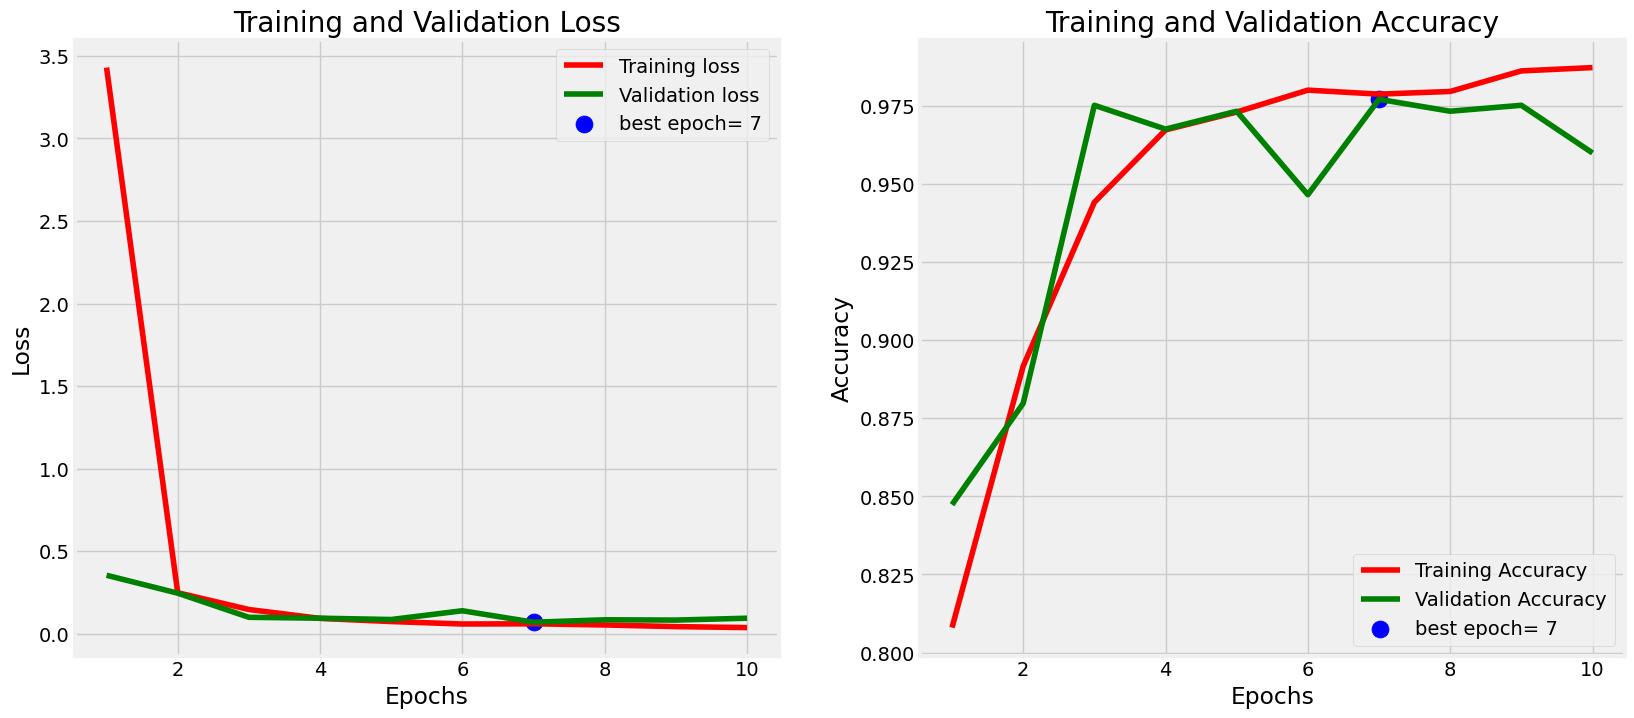

In [18]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


## Evaluating the performance of the trained model on training, validation, and test datasets.

 
The model is being evaluated on the training set, validation set, and test set, and their corresponding loss and accuracy scores are being printed.

 
Evaluating the model on different sets helps to measure how well the model has learned from the training data and how well it generalizes to unseen data (validation and test sets).


  
- `ts_length` gets the number of samples in the test set (`ts_df`).
- `test_batch_size` calculates an optimal batch size for testing.
- `test_steps` determines how many steps are needed to complete one evaluation pass.


- `model.evaluate()` is called three times:
  - `train_gen` (training set)
  - `valid_gen` (validation set)
  - `test_gen` (test set)
  each returning a tuple with the loss and accuracy.

In [19]:
train_score = model.evaluate(train_gen)
valid_score = model.evaluate(valid_gen)
test_score = model.evaluate(test_gen)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

295/295 ━━━━━━━━━━━━━━━━━━━━ 42s 138ms/step - accuracy: 0.9657 - loss: 0.0679
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.9659 - loss: 0.0819
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - accuracy: 0.9314 - loss: 0.4665
Train Loss:  0.07050386071205139
Train Accuracy:  0.9689889550209045
--------------------
Valid Loss:  0.09332835674285889
Valid Accuracy:  0.9599236845970154
--------------------
Test Loss:  1.7667971849441528
Test Accuracy:  0.7996794581413269


## Predictions

  
The model is making predictions on the test set, and the predicted class indices are extracted.

 
Needed to evaluate the model's performance in detail (creating a confusion matrix or generating a classification report).

  
- `model.predict(test_gen)` runs the model on the test set and returns the predicted probabilities.
- `np.argmax(preds, axis=1)` selects the class with the highest probability for each sample.


In [20]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes 

# Accuracy calculation
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step
Accuracy: 79.97%


## Confusion Matrix and Classification Report

Generating and visualizing the confusion matrix for the model's predictions on the test data.

The confusion matrix helps to understand how well the model is distinguishing between the different classes, showing which classes are being correctly predicted and where it is making mistakes.

* **`confusion_matrix()`** compares the true labels (`test_gen.classes`) and predicted labels (`y_pred`).
* **`sns.heatmap()`** displays the confusion matrix as a heatmap with a blue color map, offering a more visually intuitive representation of the model's performance.



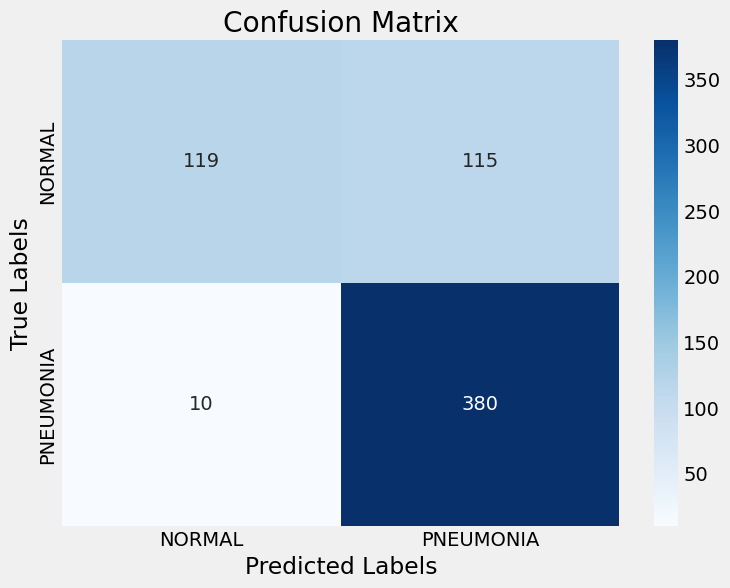

In [21]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Classification Report**

 
Classification Report showing precision, recall, f1-score, and support for each class based on the model's predictions.


The classification report gives a deeper insight into the model's performance for each class,helping identify classes where the model performs well or struggles.


- `classification_report()` compares the true labels (`test_gen.classes`) with the predicted labels (`y_pred`).


In [22]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      NORMAL       0.92      0.51      0.66       234
   PNEUMONIA       0.77      0.97      0.86       390

    accuracy                           0.80       624
   macro avg       0.85      0.74      0.76       624
weighted avg       0.83      0.80      0.78       624



# AlexNet architecture

**Why AlexNet:**
- AlexNet was one of the first CNNs to show major improvements in image classification, winning the 2012 ImageNet competition.

- Simple architecture but still achieves great performance.


**Architecture Overview**
Layers:

- 5 convolutional layers (Conv2D)

- 3 fully connected layers (Dense)

- Activation function: ReLU

- Dropout for regularization to prevent overfitting

- Softmax activation for multi-class output

**Key Features:**

- Local Receptive Fields: Captures spatial features in small regions of the image.

- Max Pooling: Reduces dimensionality and prevents overfitting.

- ReLU activation: Helps avoid vanishing gradient problems and accelerates training.

**Pros:**
- High accuracy: AlexNet significantly outperforms older methods like SVM and traditional CNNs on large-scale datasets.

- Efficient with GPU.

-Robust: Handles large and complex datasets well.

**Cons:**
- Requires a lot of memory and computation power (especially for training).

- Modern tasks demand deeper architectures with more parameters.

-  Overfitting risk.

**-**
AlexNet is a breakthrough in CNNs, showing great results for large datasets. However, its architecture may not be optimal for modern, more complex tasks where deeper networks ( ResNet) are preferred.

##  Model Breakdown
**Args:**

   - `input_shape` (tuple): Shape of the input images (default: (224, 224, 3))
   - `num_classes` (int): Number of output classes (2)
     
 **Architecture:**


- `Conv2D` layer (96, 11x11, stride=4) to quickly reduce image size.
- `MaxPooling2D` reduces the spatial dimensions to make computation faster.
- `BatchNormalization` helps stabilize and speed up training.

- `Conv2D`(256, 5x5) (to detect complex patterns) + `MaxPooling2D`+ `BatchNormalization`
- `Conv2D`(384, 3x3) ×2 + Conv2D(256, 3x3) + `MaxPooling2D`+ `BatchNormalization`
- Flatten → `Dense` + `Dropout` → `Dense`+ `Dropout` → `Dense`(num_classes, `softmax`)



**`Dropout(0.5)` is used twice to prevent overfitting.**
 
 **The final `Dense` layer uses `softmax` activation to output probabilities for each class.**


In [23]:
def build_alexnet(input_shape=(224, 224, 3), num_classes=2):
    model = Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        BatchNormalization(),

        Conv2D(256, (5, 5), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        BatchNormalization(),

        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        BatchNormalization(),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    return model

 ## Building and Compiling the AlexNet Model

creating an instance of the AlexNet model using the previously defined function and preparing it for training by compiling it.

  
Before training, we need to initialize the model and configure it with an optimizer, loss function, and evaluation metric to guide the learning process.

  
- `build_alexnet()` is called to create the AlexNet model structure.
- `compile()` is used to configure the model for training:
  - `Adam` optimizer is chosen with a small learning rate (`0.0001`) to ensure smooth and stable learning.


In [24]:
# Build and compile the AlexNet model
alexnet_model = build_alexnet()
alexnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

## Training the AlexNet Model

- Training the compiled AlexNet model on the training data and validating it on the validation set over 3 epochs.

 
Training helps the model to learn patterns from the data so it can make accurate predictions later.

 
- `fit()` starts the training process.
- `train_gen` provides batches of training images and their labels.
 `epochs=3` tells the model to loop over the entire training dataset three times. 
- The result is stored in `history`

In [25]:
history = alexnet_model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=3
)

Epoch 1/3
295/295 ━━━━━━━━━━━━━━━━━━━━ 59s 164ms/step - accuracy: 0.8700 - loss: 0.6020 - val_accuracy: 0.7214 - val_loss: 2.4927
Epoch 2/3
295/295 ━━━━━━━━━━━━━━━━━━━━ 44s 146ms/step - accuracy: 0.9445 - loss: 0.2697 - val_accuracy: 0.9313 - val_loss: 0.1909
Epoch 3/3
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 143ms/step - accuracy: 0.9525 - loss: 0.1873 - val_accuracy: 0.9771 - val_loss: 0.1010


## Evaluating the AlexNet Model on the Test Set

  
Evaluating the trained model on the test dataset to check how well it generalizes to new, unseen data. 

- `evaluate(test_gen)` runs the model on the test dataset (`test_gen`) and computes the loss and accuracy.
- `test_loss` stores the loss value, and `test_acc` stores the accuracy value for the test set.

In [26]:
test_loss, test_acc = alexnet_model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.9276 - loss: 0.3257
Test Accuracy: 0.7756


## Confusion Matrics and Classification Report
**Confusion Matrics**

Generating and visualizing the confusion matrix for the model's predictions on the test data.

  
The confusion matrix helps to understand how well the model is distinguishing between the different classes, showing which classes are being correctly predicted and where it is making mistakes.

39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step


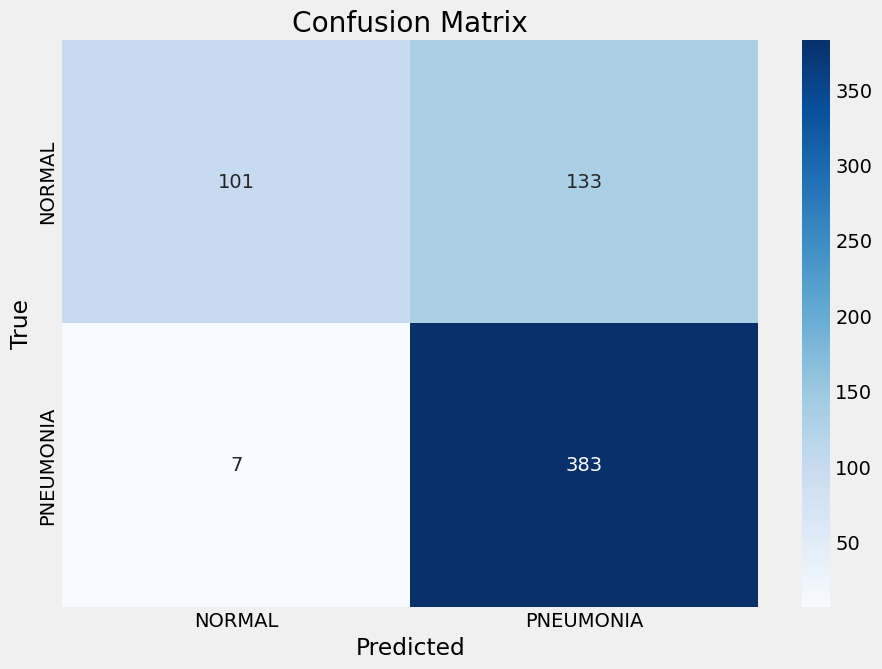

In [27]:
y_pred = alexnet_model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1) 
y_true = test_gen.classes
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)


# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Classification Report**

 
Classification Report showing precision, recall, f1-score, and support for each class based on the model's predictions.


The classification report gives a deeper insight into the model's performance for each class,helping identify classes where the model performs well or struggles.


- `classification_report()` compares the true labels (`test_gen.classes`) with the predicted labels (`y_pred`).


In [28]:
# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=test_gen.class_indices.keys())
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.94      0.43      0.59       234
   PNEUMONIA       0.74      0.98      0.85       390

    accuracy                           0.78       624
   macro avg       0.84      0.71      0.72       624
weighted avg       0.81      0.78      0.75       624



# ResNet50 Model 
## Building the ResNet50 Model 


This function defines a ResNet50 model for image classification with transfer learning, using pre-trained weights from ImageNet and adding custom layers.


We want to leverage the power of a pre-trained deep learning model (ResNet50) to quickly adapt it for our classification task, benefiting from the features learned on a large dataset like ImageNet.


- `ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)` loads the ResNet50 model without its top classification layers and with pre-trained weights from ImageNet.
- `GlobalAveragePooling2D()` reduces the spatial dimensions.
- `Dropout(0.5)` helps regularize the model.
- `Dense(512, activation='relu')` layer introduces more complexity and helps the model learn more features.
- `Dense(num_classes, activation='softmax')` outputs the class probabilities.

In [29]:
def build_resnet50(input_shape=(224, 224, 3), num_classes=2):
    base_model = ResNet50(include_top=False, weights='imagenet', 
                          input_shape=input_shape)
    base_model.trainable = False  

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

## Compiling the ResNet50 Model


The ResNet50 model is being compiled with a specific optimizer, loss function, and evaluation metric, preparing it for training.

- This step sets the configuration for how the model will be trained and optimized.

 
- `build_resnet50()` calls the function to create the ResNet50 model.
- `optimizer=Adam(learning_rate=0.0001)` sets the Adam optimizer with a small learning rate (0.0001).


In [30]:
resnet_model = build_resnet50()
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Training ResNet Model

- Training the compiled ResNet model on the training data and validating it on the validation set over 10 epochs.

 
Training helps the model to learn patterns from the data so it can make accurate predictions later.

 
- `fit()` starts the training process.
- `train_gen` provides batches of training images and their labels.
 `epochs=10` tells the model to loop over the entire training dataset 10 times. 
- The result is stored in `history`

In [31]:
history = resnet_model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 68s 181ms/step - accuracy: 0.8049 - loss: 0.5960 - val_accuracy: 0.9656 - val_loss: 0.0986
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 44s 144ms/step - accuracy: 0.9214 - loss: 0.2181 - val_accuracy: 0.9542 - val_loss: 0.1091
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 44s 144ms/step - accuracy: 0.9422 - loss: 0.1528 - val_accuracy: 0.9637 - val_loss: 0.1001
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 44s 144ms/step - accuracy: 0.9417 - loss: 0.1434 - val_accuracy: 0.9771 - val_loss: 0.0742
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 142ms/step - accuracy: 0.9510 - loss: 0.1176 - val_accuracy: 0.9752 - val_loss: 0.0692
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 142ms/step - accuracy: 0.9458 - loss: 0.1366 - val_accuracy: 0.9695 - val_loss: 0.0743
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 142ms/step - accuracy: 0.9557 - loss: 0.1170 - val_accuracy: 0.9714 - val_loss: 0.0778
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 142ms/step - accuracy: 0.9581 - loss: 0

## Evaluating the ResNet Model on the Test Set

  
Evaluating the trained model on the test dataset to check how well it generalizes to new, unseen data. 

- `evaluate(test_gen)` runs the model on the test dataset (`test_gen`) and computes the loss and accuracy.
- `test_loss` stores the loss value, and `test_acc` stores the accuracy value for the test set.

In [32]:
test_loss, test_acc = resnet_model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9424 - loss: 0.1519
Test Accuracy: 0.8125


In [55]:
# Save the model
resnet_model.save('/kaggle/working/model_resnet.h5')

In [54]:
resnet_model.save('/kaggle/working/model_resnet.h5')
print("Model saved to /kaggle/working/")

Model saved to /kaggle/working/


## Confusion Matrics and Classification Report
**Confusion Matrics**

Generating and visualizing the confusion matrix for the model's predictions on the test data.

  
The confusion matrix helps to understand how well the model is distinguishing between the different classes, showing which classes are being correctly predicted and where it is making mistakes.

39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step


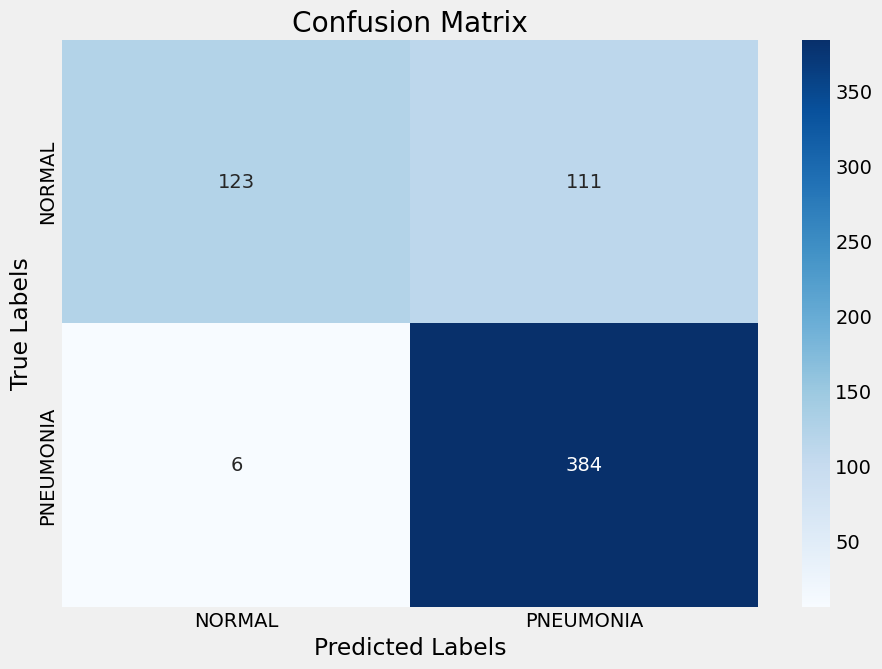

In [33]:
y_pred = resnet_model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1) 
y_true = test_gen.classes

#confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

 
Classification Report showing precision, recall, f1-score, and support for each class based on the model's predictions.


The classification report gives a deeper insight into the model's performance for each class,helping identify classes where the model performs well or struggles.


- `classification_report()` compares the true labels (`test_gen.classes`) with the predicted labels (`y_pred`).


In [34]:
report = classification_report(y_true, y_pred_classes, target_names=test_gen.class_indices.keys())
print(report)

              precision    recall  f1-score   support

      NORMAL       0.95      0.53      0.68       234
   PNEUMONIA       0.78      0.98      0.87       390

    accuracy                           0.81       624
   macro avg       0.86      0.76      0.77       624
weighted avg       0.84      0.81      0.80       624



# Attention 

 ## Channel Attention Module

This function applies **Channel Attention** to focus on important channels by reweighting the input feature map.

It enhances the model’s focus on relevant features by adjusting the contribution of each channel.
average o max conc
* **Conv2D Layers**: Reduce and then restore channel size to compute attention weights.
* **Multiply**: Reweights the input tensor based on attention weights.



In [35]:
def channel_attention(input_feature, ratio=8):
    channel = input_feature.shape[-1]

    avg_pool = layers.GlobalAveragePooling2D()(input_feature)
    avg_pool = layers.Reshape((1, 1, channel))(avg_pool)
    
    max_pool = layers.GlobalMaxPooling2D()(input_feature)
    max_pool = layers.Reshape((1, 1, channel))(max_pool)

    shared_layer_one = layers.Conv2D(channel // ratio, kernel_size=1, activation='relu', padding='same')
    shared_layer_two = layers.Conv2D(channel, kernel_size=1, padding='same')

    avg_out = shared_layer_two(shared_layer_one(avg_pool))
    max_out = shared_layer_two(shared_layer_one(max_pool))

    attention = layers.Add()([avg_out, max_out])
    attention = layers.Activation('sigmoid')(attention)

    return layers.Multiply()([input_feature, attention])


## Spatial Attention Module

This function implements **Spatial Attention**, which focuses on spatial regions of the input feature map by computing a spatial attention map based on average and maximum pooling.

It enhances the model's ability to focus on important spatial regions in the feature map by applying a spatial attention mechanism.

* **Average and Max Pooling**: Compute average and max values across channels to capture global spatial information.
* **Concatenate**: Combine the pooled maps along the channel axis.
* **Conv2D**: Apply a convolution to produce a spatial attention map.
* **Multiply**: Reweight the input feature map based on the attention map.



In [36]:
def spatial_attention(input_feature):
   
    avg_pool = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_feature)
    max_pool = layers.Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_feature)

    concat = layers.Concatenate(axis=-1)([avg_pool, max_pool])
    
    spatial_attention = layers.Conv2D(1, kernel_size=7, strides=1, padding='same', activation='sigmoid')(concat)
    
    output_feature = layers.Multiply()([input_feature, spatial_attention])
    
    return output_feature

## CBAM Block (Channel + Spatial)

**Combining Channel and Spatial Attention Mechanisms**

This function defines the **CBAM block**, which refines a feature map by applying **channel attention** (what to focus on) and **spatial attention** (where to focus).
It enhances the input by:

1. Emphasizing key feature channels via `channel_attention(input_feature, ratio)`.
2. Highlighting important spatial regions via `spatial_attention(x)`.

In [37]:
def cbam_block(input_feature, ratio=8):
    x = channel_attention(input_feature, ratio)
    x = spatial_attention(x)
    return x

 ## Building CBAM Model
 ## CNN with CBAM

This function defines a CNN model with integrated **CBAM blocks** to enhance feature focus through channel and spatial attention.

Building a CNN that improves focus on important features using the CBAM mechanism.



* **Conv2D**: The model starts with several convolutional layers to learn images features.
* **MaxPooling2D** layers to help the model focus on the most important parts.
* **CBAM Block**: Apply attention to enhance features.
* **Dense Layers**: Flatten and classify with softmax output.


In [38]:
def create_cnn_cbam(input_shape, num_classes):
    input_layer = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    
    x = cbam_block(x)

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

   
    x = cbam_block(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=input_layer, outputs=output_layer)

    return model

## Compiling, and Training the Model

This section defines the **CBAM-enhanced CNN** model for image classification, using **Channel Attention** and **Spatial Attention** to refine feature representations.

1. **Model Building (`build_cbam_cnn`)**: A CNN model with CBAM layers enhances feature maps.
2. **Model Compilation**: The model is compiled with Adam optimizer and categorical cross-entropy loss for multi-class classification.
3. 

* **`model_cbam.compile()`**: Sets up the optimizer, loss, and metrics for effective training.
* **`model_cbam.fit()`**: Trains the model on the training data, with validation during training to monitor performance.


## Compiling the CBAM Model

The model is compiled with Adam optimizer and categorical cross-entropy loss for multi-class classification.

In [39]:
from tensorflow.keras import layers, models


In [40]:
input_shape = (224, 224, 3)
num_classes = 2  

# Create the model
model_cbam = create_cnn_cbam(input_shape, num_classes)
model_cbam.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model
The model is trained for 10 epochs using `train_gen`, with validation from `valid_gen`.

In [41]:
history = model_cbam.fit(train_gen, validation_data=valid_gen, epochs=10)

Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 60s 169ms/step - accuracy: 0.8395 - loss: 11.1219 - val_accuracy: 0.9447 - val_loss: 0.1362
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 44s 145ms/step - accuracy: 0.9784 - loss: 0.0605 - val_accuracy: 0.9866 - val_loss: 0.0548
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 44s 145ms/step - accuracy: 0.9784 - loss: 0.0541 - val_accuracy: 0.9828 - val_loss: 0.0470
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 144ms/step - accuracy: 0.9948 - loss: 0.0197 - val_accuracy: 0.9847 - val_loss: 0.0478
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 143ms/step - accuracy: 0.9938 - loss: 0.0164 - val_accuracy: 0.9866 - val_loss: 0.0429
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 143ms/step - accuracy: 0.9933 - loss: 0.0180 - val_accuracy: 0.9866 - val_loss: 0.0365
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 143ms/step - accuracy: 0.9968 - loss: 0.0093 - val_accuracy: 0.9905 - val_loss: 0.0456
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 44s 145ms/step - accuracy: 0.9973 - loss: 

## Evaluating

  
Evaluating the trained model on the test dataset to check how well it generalizes to new, unseen data. 

- `evaluate(test_gen)` runs the model on the test dataset (`test_gen`) and computes the loss and accuracy.
- `test_loss` stores the loss value, and `test_acc` stores the accuracy value for the test set.

In [42]:
# Evaluate
test_loss, test_acc = model_cbam.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9319 - loss: 0.5173
Test Accuracy: 0.7580


## Predictions

  
The model is making predictions on the test set, and the predicted class indices are extracted.

 
Needed to evaluate the model's performance in detail (creating a confusion matrix or generating a classification report).

  
- `model.predict(test_gen)` runs the model on the test set and returns the predicted probabilities.
- `np.argmax(preds, axis=1)` selects the class with the highest probability for each sample.


In [43]:
# Predict
y_pred = model_cbam.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes

39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step


In [44]:
model_cbam.save("model_cbam.h5")

## Confusion Matrics and Classification Report
**Confusion Matrics**

Generating and visualizing the confusion matrix for the model's predictions on the test data.

  
The confusion matrix helps to understand how well the model is distinguishing between the different classes, showing which classes are being correctly predicted and where it is making mistakes.

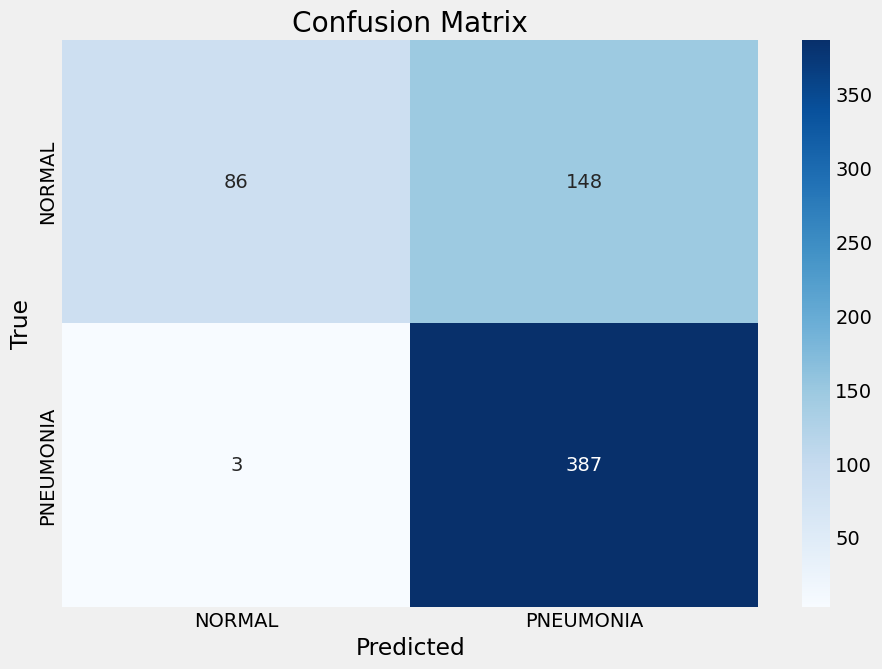

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_gen.class_indices.keys(),
            yticklabels=test_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

 
Classification Report showing precision, recall, f1-score, and support for each class based on the model's predictions.


The classification report gives a deeper insight into the model's performance for each class,helping identify classes where the model performs well or struggles.


- `classification_report()` compares the true labels with the predicted labels.


# Model Comparison
## Comparing Test Accuracies of Different Models

Comparing the test accuracies of all models (Model, AlexNet, Resnet, CBAM Model) with a bar chart and table.



- This allows us to see how well each model performs on data, helping to assess which one performs best on the test set.

 
- `model.evaluate(test_gen, verbose=0)[1]` extracts the accuracy from the evaluation of the test data for each model.
- The accuracy values are converted into percentages.
- A bar plot is generated where each model's test accuracy is visualized as a bar.

- A Pandas DataFrame (`result_df`) is created to organize the model names and their corresponding test accuracies.

In [46]:
# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=test_gen.class_indices.keys()))

              precision    recall  f1-score   support

      NORMAL       0.97      0.37      0.53       234
   PNEUMONIA       0.72      0.99      0.84       390

    accuracy                           0.76       624
   macro avg       0.84      0.68      0.68       624
weighted avg       0.81      0.76      0.72       624



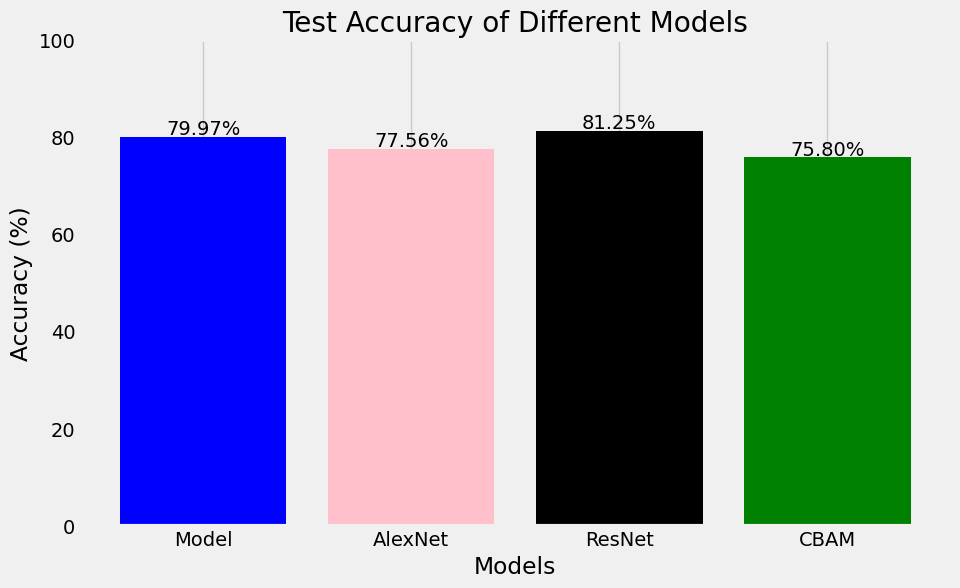

     Model  Test Accuracy (%)
0    Model          79.967946
1  AlexNet          77.564102
2   ResNet          81.250000
3     CBAM          75.801283


In [47]:
# Evaluate models and extract accuracy 
model_test_accuracy = model.evaluate(test_gen, verbose=0)[1]
alexnet_test_accuracy = alexnet_model.evaluate(test_gen, verbose=0)[1]
resnet_test_accuracy = resnet_model.evaluate(test_gen, verbose=0)[1]
cbam_test_accuracy = model_cbam.evaluate(test_gen, verbose=0)[1] 


model_test_accuracy_percentage = model_test_accuracy * 100
alexnet_test_accuracy_percentage = alexnet_test_accuracy * 100
resnet_test_accuracy_percentage = resnet_test_accuracy * 100
cbam_test_accuracy_percentage = cbam_test_accuracy * 100  

# Models and their accuracies
models = ['Model', 'AlexNet', 'ResNet', 'CBAM']  
accuracies = [model_test_accuracy_percentage, alexnet_test_accuracy_percentage, resnet_test_accuracy_percentage, cbam_test_accuracy_percentage]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'pink', 'black', 'green'])  
plt.ylim(0, 100)
plt.title('Test Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.grid(axis='y')

# Displaying accuracies on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

plt.show()

# Creating a DataFrame 
result_df = pd.DataFrame({
    'Model': models,
    'Test Accuracy (%)': accuracies
})

# Displaying the results 
print(result_df)


In [48]:
from IPython.display import FileLink
FileLink(r'/working/model_cbam.h5')

/working/model_cbam.h5

In [49]:
# Save the model
model_cbam.save('/kaggle/working/model_cbam.h5')


In [50]:
model_cbam.save('/kaggle/working/model_cbam.h5')
print("Model saved to /kaggle/working/")


Model saved to /kaggle/working/
